In [2]:
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #Exactitud
from sklearn.metrics import precision_score #Precision
from sklearn.metrics import recall_score #Sensibilidad
from sklearn.metrics import f1_score #Puntaje F1
from sklearn.metrics import roc_auc_score #auc_roc

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('winequality-red.csv', sep=";")

In [5]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
9,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7


In [10]:
#comprobar si en el DataFrame hay valores nulos y verificar los tipos de datos

assert df.notnull().all().all()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.isnull().sum() # No hay datos nulos en el dataframe 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#detalles estadísticos

df.describe() #ningún vino obtuvo un puntaje inferior a 3 o superior a 9 (sin puntajes perfectos)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241E6A7CE48>,
      dtype=object)

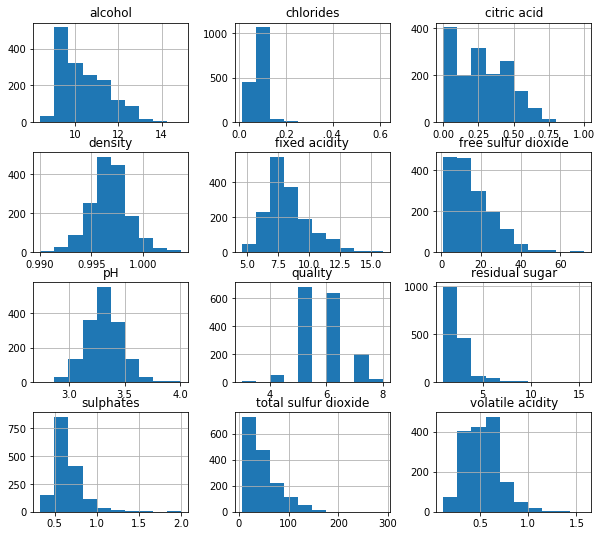

In [13]:
#Histogramas para mostrar la distribución de los valores de las variables
df.hist(figsize=(10,9))

#Observaciones sobre variables: todas las variables tienen valores atípicos
#La calidad tiene la mayoría de los valores concentrados en las categorías de calidad 5,6,7. 
#Solo una pequeña proporción se encuentra en las categorías [3, 4] y [8, 9] y ninguna en las categorías [1, 2] y 10.

In [14]:
df['quality'].unique() # datos de calidad que solo se ocupan

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# EDA

In [10]:

correlacion = df.corr(method ='pearson')
print(correlacion)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

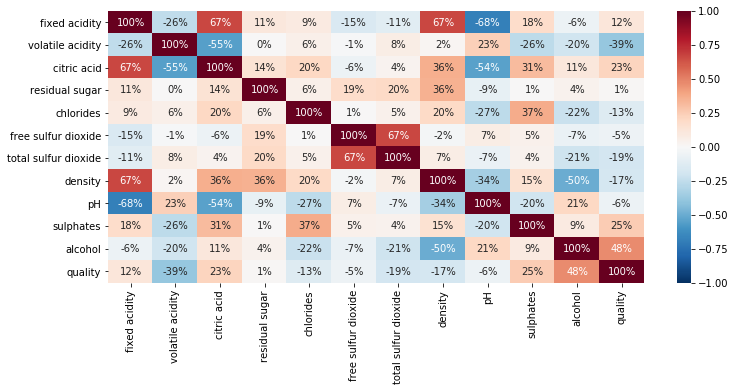

In [15]:
#Mapa de calor de las variables para ver correlacion entre ellas

correlacion = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlacion, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r", fmt='.0%')

In [18]:
print(abs(correlacion['quality'])> 0.2) #correlación de aproximadamente 0.2 (valor absoluto) para eliminar atributos redundantes

fixed acidity           False
volatile acidity         True
citric acid              True
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates                True
alcohol                  True
quality                  True
Name: quality, dtype: bool


In [19]:
# Vemos que tenemos 5 variables de mayor importancia que tienen correlacion con calidad, trabajaremos con alcohol, 
# sulphates, citric acid, fixed acidity y residual_sugar

correlacion['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [20]:
#Como los datos estan desiquilibrados,  transformamos la calidad en datos binarios para clasificarlos en buenos y malos
#ocuparemos el rango de promedio, ya que queremos utilizar solo los vinos con mejor reputacion(calidad).

def esCalidad(quality):
    if quality >= 7:
        return 1
    else:
        return 0
df['Clasificacion'] = df['quality'].apply(esCalidad)
df['Clasificacion'].value_counts()

0    1382
1     217
Name: Clasificacion, dtype: int64

In [21]:
df.head(25)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clasificacion
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


# Algoritmos supervisados de ML para el caso
## Regresion Logistica

In [22]:
#Regresion logistica

X = df[['alcohol','sulphates','citric acid','fixed acidity']]
Y = df.iloc[:,12]

In [1]:
# Estandarizacion las variables de las caracteristicas

from sklearn.preprocessing import StandardScaler
X_standar = X
X = StandardScaler().fit_transform(X)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)


# Normalización de las caracteristicas
from sklearn.preprocessing import Normalizer

X_normalizer = Normalizer().fit_transform(X)


NameError: name 'X' is not defined

In [ ]:
#Divizion de los datos en entrenamiento y prueba 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

modelo = LogisticRegression()

In [26]:
modelo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = modelo.predict(X_test)
matriz_modelo_RL = confusion_matrix(y_test, y_pred)
reporte_modelo_RL = classification_report(y_test, y_pred)

In [28]:
print('Datos de entrenamiento')
print(y_test.to_list())
print('Datos obtenidos por prediccion')
print(y_pred)

Datos de entrenamiento
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Datos obtenidos 

## Matriz de Confusion y Reporte RL
#### VP es la cantidad de positivos que fueron clasificados correctamente como positivos por el modelo.
#### VN es la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.
#### FN es la cantidad de positivos que fueron clasificados incorrectamente como negativos. Error tipo 2 (Falsos Negativos)
#### FP es la cantidad de negativos que fueron clasificados incorrectamente como positivos. Error tipo 1 (Falsos positivos)

In [29]:
print(matriz_modelo_RL) ##Matriz de Confusioin
print(reporte_modelo_RL)  # Reporte VP-

[[280  10]
 [ 22   8]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       290
           1       0.44      0.27      0.33        30

    accuracy                           0.90       320
   macro avg       0.69      0.62      0.64       320
weighted avg       0.88      0.90      0.89       320



In [30]:
from prettytable import PrettyTable # -->pip install PrettyTable para markdown

## Metricas de Clasificacion para RL

In [38]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Sensibilidad", "puntaje_f1", "Exactitud", "AUC-ROC"]
ptbl.add_row(["Linear", precision_score(y_test, y_pred, average = 'weighted'),
           recall_score(y_test, y_pred, average = 'weighted'), f1_score(y_test, y_pred, average = 'weighted'),
           accuracy_score(y_test, y_pred, normalize=True), roc_auc_score(y_test, y_pred, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
| Regressor Model |     Precision      | Sensibilidad |     puntaje_f1     | Exactitud |      AUC-ROC       |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
|      Linear     | 0.8818984547461367 |     0.9      | 0.8885135135135135 |    0.9    | 0.6160919540229884 |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+


## Metricas de Analisis de Errores de Regresion RL

In [39]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
error_rl = sqrt (mean_squared_error(y_test, y_pred)) 
error_mae_rl = mean_squared_error(y_test, y_pred) 
error_r2_rl = r2_score(y_test, y_pred)
ptbl_error_rl = PrettyTable()
ptbl_error_rl.field_names = ["Regressor Model", "RMSE", "MAE", "R^2"]
ptbl_error_rl.add_row(["Regresion Logistica", error_rl, error_mae_rl, error_r2_rl])
print(ptbl_error_rl)

+---------------------+---------------------+-----+----------------------+
|   Regressor Model   |         RMSE        | MAE |         R^2          |
+---------------------+---------------------+-----+----------------------+
| Regresion Logistica | 0.31622776601683794 | 0.1 | -0.17701149425287355 |
+---------------------+---------------------+-----+----------------------+


# --Algorimto Árbol de decisión

In [40]:
# Algorimto Árbol de decisión

data = pd.read_csv('winequality-red.csv', sep=";")
data = DecisionTreeClassifier(random_state = 1, max_depth=5) 
data.fit (X_train, y_train) 
y_pred_ad = data.predict (X_test)

 ## Matriz de Confusion y Reporte AD

In [41]:
print(confusion_matrix(y_test, y_pred_ad))
print(classification_report(y_test, y_pred_ad)) #Reporte

[[280  10]
 [ 20  10]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       290
           1       0.50      0.33      0.40        30

    accuracy                           0.91       320
   macro avg       0.72      0.65      0.67       320
weighted avg       0.89      0.91      0.90       320



## Metricas de Clasificacion AD

In [42]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
ptbl_ad = PrettyTable()
ptbl_ad.field_names = ["Regressor Model", "Precision", "Sensibilidad", "puntaje_f1", "Exactitud", "AUC-ROC"]
ptbl_ad.add_row(["Arbol Desicion", precision_score(y_test, y_pred_ad, average = 'weighted'),
           recall_score(y_test, y_pred_ad, average = 'weighted'), f1_score(y_test, y_pred_ad, average = 'weighted'),
           accuracy_score(y_test, y_pred_ad, normalize=True), roc_auc_score(y_test, y_pred_ad, average = 'weighted')])
print(ptbl_ad)

+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
| Regressor Model |     Precision      | Sensibilidad |     puntaje_f1     | Exactitud |      AUC-ROC       |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
|  Arbol Desicion | 0.8927083333333334 |   0.90625    | 0.8976694915254239 |  0.90625  | 0.6494252873563219 |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+


## Metricas de Analisis de Errores de Regresion AD

In [43]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
error_ad = sqrt (mean_squared_error(y_test, y_pred_ad)) 
error_mae_ad = mean_squared_error(y_test, y_pred_ad) 
error_r2_ad = r2_score(y_test, y_pred_ad)
ptbl_error_ad = PrettyTable()
ptbl_error_ad.field_names = ["Regressor Model", "RMSE", "MAE", "R^2"]
ptbl_error_ad.add_row(["Arbol de Desicion", error_ad, error_mae_ad, error_r2_ad])
print(ptbl_error_ad)

+-------------------+---------------------+---------+----------------------+
|  Regressor Model  |         RMSE        |   MAE   |         R^2          |
+-------------------+---------------------+---------+----------------------+
| Arbol de Desicion | 0.30618621784789724 | 0.09375 | -0.10344827586206895 |
+-------------------+---------------------+---------+----------------------+


# --Algoritmo Vecinos mas cercanos 

([<matplotlib.axis.XTick at 0x241e8367c08>,
 <a list of 5 Text xticklabel objects>)

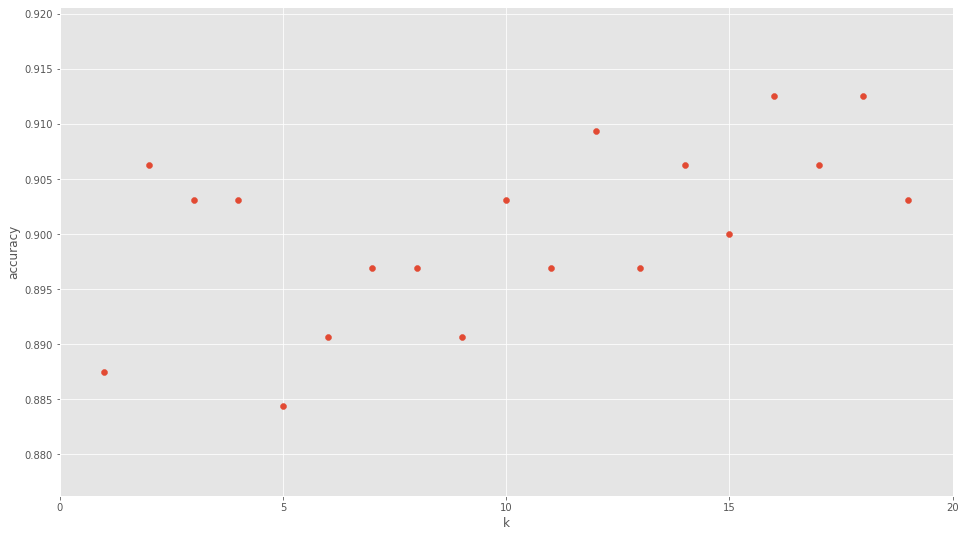

In [53]:
#Algoritmo Vecinos mas cercanos 

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data1 = pd.read_csv('winequality-red.csv', sep=";")

#Eleccion de valor K
n_neighbors = 7
k_rango = range(1, 20)
scores = []
for k in k_rango:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_rango, scores)
plt.xticks([0,5,10,15,20])

## Matriz de Confusion y Reporte K-Vecinos

In [54]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred)) #-	Matriz de confusión
print(classification_report(y_test, pred)) #Reporte

[[277  13]
 [ 18  12]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.48      0.40      0.44        30

    accuracy                           0.90       320
   macro avg       0.71      0.68      0.69       320
weighted avg       0.90      0.90      0.90       320



In [58]:
print('Datos de entrenamiento')
print(y_test.to_list())
print('Datos obtenidos por prediccion')
print(pred)

Datos de entrenamiento
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Datos obtenidos 

## Metricas de Clasificacion K-Vecinos

In [59]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
ptbl_vc = PrettyTable()
ptbl_vc.field_names = ["Regressor Model", "Precision", "Sensibilidad", "puntaje_f1", "Exactitud", "AUC-ROC"]
ptbl_vc.add_row(["K-Vecinos mas cercanos", precision_score(y_test, pred, average = 'weighted'),
           recall_score(y_test, pred, average = 'weighted'), f1_score(y_test, pred, average = 'weighted'),
           accuracy_score(y_test, pred, normalize=True), roc_auc_score(y_test, pred, average = 'weighted')])
print(ptbl_vc)

+------------------------+--------------------+--------------+--------------------+-----------+--------------------+
|    Regressor Model     |     Precision      | Sensibilidad |     puntaje_f1     | Exactitud |      AUC-ROC       |
+------------------------+--------------------+--------------+--------------------+-----------+--------------------+
| K-Vecinos mas cercanos | 0.8959533898305084 |   0.903125   | 0.8991355866355866 |  0.903125 | 0.6775862068965517 |
+------------------------+--------------------+--------------+--------------------+-----------+--------------------+


## Metricas de Analisis de Errores de Regresion K-Vecinos

In [60]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
error_k = sqrt (mean_squared_error(y_test, pred)) 
error_mae_k = mean_squared_error(y_test, pred) 
error_r2_k = r2_score(y_test, pred)
ptbl_error_k = PrettyTable()
ptbl_error_k.field_names = ["Regressor Model", "RMSE", "MAE", "R^2"]
ptbl_error_k.add_row(["K-Vecinos Cercanos", error_k, error_mae_k, error_r2_k])
print(ptbl_error_k)

+--------------------+--------------------+----------+----------------------+
|  Regressor Model   |        RMSE        |   MAE    |         R^2          |
+--------------------+--------------------+----------+----------------------+
| K-Vecinos Cercanos | 0.3112474899497183 | 0.096875 | -0.14022988505747125 |
+--------------------+--------------------+----------+----------------------+


# Algoritmo Máquinas de vectores de soporte

In [61]:
#Algoritmo Máquinas de vectores de soporte

from sklearn.svm import SVC

modelo_vs = SVC()
modelo_vs.fit(X_train, y_train)
y_pred_vs = modelo_vs.predict(X_test)

print('Datos de entrenamiento')
print(y_test.to_list())
print('Datos obtenidos por prediccion')
print(y_pred_vs)

Datos de entrenamiento
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Datos obtenidos 

## Matriz de confusion y Reporte Vector de Soporte

In [62]:
print(confusion_matrix(y_test, y_pred_vs)) #	Matriz de confusión
print(classification_report(y_test, y_pred_vs)) #Reporte

[[286   4]
 [ 20  10]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       290
           1       0.71      0.33      0.45        30

    accuracy                           0.93       320
   macro avg       0.82      0.66      0.71       320
weighted avg       0.91      0.93      0.91       320



## Metricas de Clasificacion VS

In [63]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
ptbl_vs = PrettyTable()
ptbl_vs.field_names = ["Regressor Model", "Precision", "Sensibilidad", "puntaje_f1", "Exactitud", "AUC-ROC"]
ptbl_vs.add_row(["Vector de Soporte", precision_score(y_test, y_pred_vs, average = 'weighted'),
           recall_score(y_test, y_pred_vs, average = 'weighted'), f1_score(y_test, y_pred_vs, average = 'weighted'),
           accuracy_score(y_test, y_pred_vs, normalize=True), roc_auc_score(y_test, y_pred_vs, average = 'weighted')])
print(ptbl_vs)

+-------------------+-------------------+--------------+--------------------+-----------+--------------------+
|  Regressor Model  |     Precision     | Sensibilidad |     puntaje_f1     | Exactitud |      AUC-ROC       |
+-------------------+-------------------+--------------+--------------------+-----------+--------------------+
| Vector de Soporte | 0.913982259570495 |    0.925     | 0.9123703477730322 |   0.925   | 0.6597701149425287 |
+-------------------+-------------------+--------------+--------------------+-----------+--------------------+


 ## Metricas de Analisis de Errores de Regresion VS

In [64]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
error_vs = sqrt (mean_squared_error(y_test, y_pred_vs)) 
error_mae_vs = mean_squared_error(y_test, y_pred_vs) 
error_r2_vs = r2_score(y_test, y_pred_vs)
ptbl_error_vs = PrettyTable()
ptbl_error_vs.field_names = ["Regressor Model", "RMSE", "MAE", "R^2"]
ptbl_error_vs.add_row(["Vector Soporte", error_vs, error_mae_vs, error_r2_vs])
print(ptbl_error_vs)

+-----------------+---------------------+-------+---------------------+
| Regressor Model |         RMSE        |  MAE  |         R^2         |
+-----------------+---------------------+-------+---------------------+
|  Vector Soporte | 0.27386127875258304 | 0.075 | 0.11724137931034484 |
+-----------------+---------------------+-------+---------------------+


# Algoritmo Bayesiano Ingenuo (Naive Bayes)

In [65]:
#Algoritmo Bayesiano Ingenuo (Naive Bayes)

from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred_nb = modelo_nb.predict(X_test)

print('Datos de entrenamiento')
print(y_test.to_list())
print('Datos obtenidos por prediccion')
print(y_pred_nb)

Datos de entrenamiento
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Datos obtenidos 

## Matriz de Confusion y Reporte Naive Bayes

In [66]:
print(confusion_matrix(y_test, y_pred_nb)) #Matriz de confusión
print(classification_report(y_test, y_pred_nb)) #Reporte 

[[266  24]
 [ 15  15]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       290
           1       0.38      0.50      0.43        30

    accuracy                           0.88       320
   macro avg       0.67      0.71      0.68       320
weighted avg       0.89      0.88      0.89       320



 ## Metricas de Clasificacion Naive Bayes

In [67]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
ptbl_nb = PrettyTable()
ptbl_nb.field_names = ["Regressor Model", "Precision", "Sensibilidad", "puntaje_f1", "Exactitud", "AUC-ROC"]
ptbl_nb.add_row(["Naive Bayes", precision_score(y_test, y_pred_nb, average = 'weighted'),
           recall_score(y_test, y_pred_nb, average = 'weighted'), f1_score(y_test, y_pred_nb, average = 'weighted'),
           accuracy_score(y_test, y_pred_nb, normalize=True), roc_auc_score(y_test, y_pred_nb, average = 'weighted')])
print(ptbl_nb)

+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
| Regressor Model |     Precision      | Sensibilidad |     puntaje_f1     | Exactitud |      AUC-ROC       |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
|   Naive Bayes   | 0.8939313577881194 |   0.878125   | 0.8851128835757253 |  0.878125 | 0.7086206896551726 |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+


## Metricas de Analisis de Errores de Regresion Naive Bayes

In [68]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
error_nb = sqrt (mean_squared_error(y_test, y_pred_nb)) 
error_mae_nb = mean_squared_error(y_test, y_pred_nb) 
error_r2_nb = r2_score(y_test, y_pred_nb)
ptbl_error_nb = PrettyTable()
ptbl_error_nb.field_names = ["Regressor Model", "RMSE", "MAE", "R^2"]
ptbl_error_nb.add_row(["Naive Bayes", error_nb, error_mae_nb, error_r2_nb])
print(ptbl_error_nb)

+-----------------+--------------------+----------+----------------------+
| Regressor Model |        RMSE        |   MAE    |         R^2          |
+-----------------+--------------------+----------+----------------------+
|   Naive Bayes   | 0.3491060010942235 | 0.121875 | -0.43448275862068964 |
+-----------------+--------------------+----------+----------------------+


# Algorimto Bosques Aleatorios (Random Forest)

In [69]:
#Algorimto Bosques Aleatorios (Random Forest)

from sklearn.ensemble import RandomForestClassifier

modelo_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state = 0)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print('Datos de entrenamiento')
print(y_test.to_list())
print('Datos obtenidos por prediccion')
print(y_pred_rf)


Datos de entrenamiento
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Datos obtenidos 

 ## Matriz de Confusion y Reporte Random Forest

In [70]:
print(confusion_matrix(y_test, y_pred_rf)) #Matriz de Confusion
print(classification_report(y_test, y_pred_rf))#Reporte

[[278  12]
 [ 13  17]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       290
           1       0.59      0.57      0.58        30

    accuracy                           0.92       320
   macro avg       0.77      0.76      0.77       320
weighted avg       0.92      0.92      0.92       320



 ## Metricas de Clasificacion Random Forest

In [71]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
ptbl_rf = PrettyTable()
ptbl_rf.field_names = ["Regressor Model", "Precision", "Sensibilidad", "puntaje_f1", "Exactitud", "AUC-ROC"]
ptbl_rf.add_row(["Arbol Aleatorio", precision_score(y_test, y_pred_rf, average = 'weighted'),
           recall_score(y_test, y_pred_rf, average = 'weighted'), f1_score(y_test, y_pred_rf, average = 'weighted'),
           accuracy_score(y_test, y_pred_rf, normalize=True), roc_auc_score(y_test, y_pred_rf, average = 'weighted')])
print(ptbl_rf)

+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
| Regressor Model |     Precision      | Sensibilidad |     puntaje_f1     | Exactitud |      AUC-ROC       |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+
| Arbol Aleatorio | 0.9207215013627208 |   0.921875   | 0.9212801569474021 |  0.921875 | 0.7626436781609195 |
+-----------------+--------------------+--------------+--------------------+-----------+--------------------+


 ## Metricas de Analisis de Errores de Regresion  Random Forest

In [72]:
#Metrica de Analisis de Errores Regresion 

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt


In [73]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
error_rf = sqrt (mean_squared_error(y_test, y_pred_rf)) 
error_mae = mean_squared_error(y_test, y_pred_rf) 
error_r2 = r2_score(y_test, y_pred_rf)
ptbl_error_rf = PrettyTable()
ptbl_error_rf.field_names = ["Regressor Model", "RMSE", "MAE", "R^2"]
ptbl_error_rf.add_row(["Arbol Aleatorio", error_rf, error_mae, error_r2])
print(ptbl_error_rf)

+-----------------+--------------------+----------+---------------------+
| Regressor Model |        RMSE        |   MAE    |         R^2         |
+-----------------+--------------------+----------+---------------------+
| Arbol Aleatorio | 0.2795084971874737 | 0.078125 | 0.08045977011494254 |
+-----------------+--------------------+----------+---------------------+


# Resumen de Metricas Obtenidas:

In [74]:
warnings.filterwarnings('ignore')
ptbl_1 = PrettyTable()
ptbl_1.field_names = ["Regressor Model", "Precison", "Sensibilidad", "Puntaje_f1", "Exactitud", "AUC-ROC"]
ptbl_1.add_row(["Linear", precision_score(y_test, y_pred, average = 'weighted'),
           recall_score(y_test, y_pred, average = 'weighted'), f1_score(y_test, y_pred, average = 'weighted'),
           accuracy_score(y_test, y_pred, normalize=True), roc_auc_score(y_test, y_pred, average = 'weighted')])
ptbl_1.add_row(["Arbol Desicion", precision_score(y_test, y_pred_ad, average = 'weighted'),
           recall_score(y_test, y_pred_ad, average = 'weighted'), f1_score(y_test, y_pred_ad, average = 'weighted'),
           accuracy_score(y_test, y_pred_ad, normalize=True), roc_auc_score(y_test, y_pred_ad, average = 'weighted')])
ptbl_1.add_row(["K-Vecinos mas cercanos", precision_score(y_test, pred, average = 'weighted'),
           recall_score(y_test, pred, average = 'weighted'), f1_score(y_test, pred, average = 'weighted'),
           accuracy_score(y_test, pred, normalize=True), roc_auc_score(y_test, pred, average = 'weighted')])
ptbl_1.add_row(["Vector de Soporte", precision_score(y_test, y_pred_vs, average = 'weighted'),
           recall_score(y_test, y_pred_vs, average = 'weighted'), f1_score(y_test, y_pred_vs, average = 'weighted'),
           accuracy_score(y_test, y_pred_vs, normalize=True), roc_auc_score(y_test, y_pred_vs, average = 'weighted')])
ptbl_1.add_row(["Naive Bayes", precision_score(y_test, y_pred_nb, average = 'weighted'),
           recall_score(y_test, y_pred_nb, average = 'weighted'), f1_score(y_test, y_pred_nb, average = 'weighted'),
           accuracy_score(y_test, y_pred_nb, normalize=True), roc_auc_score(y_test, y_pred_nb, average = 'weighted')])
ptbl_1.add_row(["Arbol Aleatorio", precision_score(y_test, y_pred_rf, average = 'weighted'),
           recall_score(y_test, y_pred_rf, average = 'weighted'), f1_score(y_test, y_pred_rf, average = 'weighted'),
           accuracy_score(y_test, y_pred_rf, normalize=True), roc_auc_score(y_test, y_pred_rf, average = 'weighted')])
print(ptbl_1)

+------------------------+--------------------+--------------+--------------------+-----------+--------------------+
|    Regressor Model     |      Precison      | Sensibilidad |     Puntaje_f1     | Exactitud |      AUC-ROC       |
+------------------------+--------------------+--------------+--------------------+-----------+--------------------+
|         Linear         | 0.8818984547461367 |     0.9      | 0.8885135135135135 |    0.9    | 0.6160919540229884 |
|     Arbol Desicion     | 0.8927083333333334 |   0.90625    | 0.8976694915254239 |  0.90625  | 0.6494252873563219 |
| K-Vecinos mas cercanos | 0.8959533898305084 |   0.903125   | 0.8991355866355866 |  0.903125 | 0.6775862068965517 |
|   Vector de Soporte    | 0.913982259570495  |    0.925     | 0.9123703477730322 |   0.925   | 0.6597701149425287 |
|      Naive Bayes       | 0.8939313577881194 |   0.878125   | 0.8851128835757253 |  0.878125 | 0.7086206896551726 |
|    Arbol Aleatorio     | 0.9207215013627208 |   0.921875   | 0

In [75]:
warnings.filterwarnings('ignore') #resultado usando tablas MarkDown
ptbl_2 = PrettyTable()
ptbl_2.field_names = ["Regressor Model", "RMSE", "MAE", "R^2"]
ptbl_2.add_row(["Linear", error_rl, error_mae_rl, error_r2_rl])
ptbl_2.add_row(["Arbol de Desicion", error_ad, error_mae_ad, error_r2_ad])
ptbl_2.add_row(["K-Vecinos Cercanos", error_k, error_mae_k, error_r2_k])
ptbl_2.add_row(["Vector Soporte", error_vs, error_mae_vs, error_r2_vs])
ptbl_2.add_row(["Naive Bayes", error_nb, error_mae_nb, error_r2_nb])
ptbl_2.add_row(["Arbol Aleatorio", error_rf, error_mae, error_r2])
print(ptbl_2)

+--------------------+---------------------+----------+----------------------+
|  Regressor Model   |         RMSE        |   MAE    |         R^2          |
+--------------------+---------------------+----------+----------------------+
|       Linear       | 0.31622776601683794 |   0.1    | -0.17701149425287355 |
| Arbol de Desicion  | 0.30618621784789724 | 0.09375  | -0.10344827586206895 |
| K-Vecinos Cercanos |  0.3112474899497183 | 0.096875 | -0.14022988505747125 |
|   Vector Soporte   | 0.27386127875258304 |  0.075   | 0.11724137931034484  |
|    Naive Bayes     |  0.3491060010942235 | 0.121875 | -0.43448275862068964 |
|  Arbol Aleatorio   |  0.2795084971874737 | 0.078125 | 0.08045977011494254  |
+--------------------+---------------------+----------+----------------------+


<h1 style="text-align: center"> Conclusiones</h1>

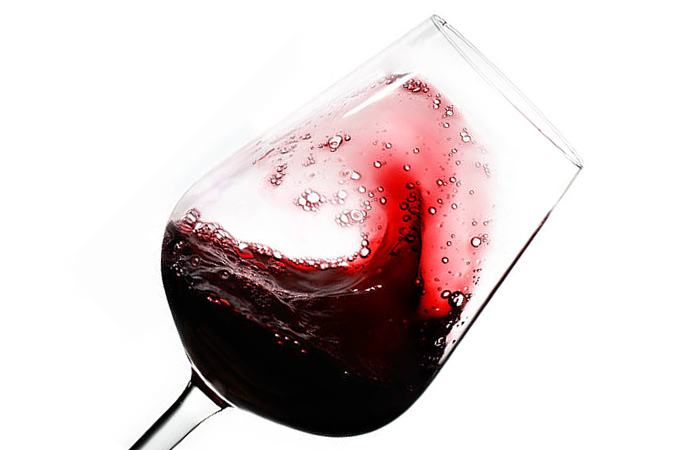

* El mejor modelo que se ajusta para predecir un buen vino de calidad es Random Forest (Arbol Aleatorio).
* Al decidir qué algoritmo de regresión es mejor mirando el RMSE, sería mejor 
  elegir el que tenga un valor más pequeño, por lo que para este problema, 
  la Regresión Random Forest parece ser el algoritmo de mejor ajuste, depues seria vector soporte.
* Podemos ver que en el algoritmo Ramdom forest las carecteristicas que mas influyen en la eleccion de un buen vino tinto,
  son el **fixed acidity(acidez fija) y volatile acidity (acidez volatil)**
* la Función de puntuación de regresión **R^2(coeficiente de determinación)** es positiva y cercana a 1 (0.08) lo que nos dice que   el modelo tiene buen acercamiento a predecir correctamente, pero debe ajustarse. en este caso vector soporte se encuentra mas   ajustado
* La efectividad de nuestro modelo elegido es (Random Forest) por la cantidad de aciertos que tuvo gracias La Matriz de   confusión, ya que la cantidad de verdaderos positivos que fueron clasificados correctamente como positivos por el modelo fue de 278 vinos como Rojos, 



In [76]:
modelo_rf.feature_importances_

array([0.32273265, 0.24898197, 0.2252189 , 0.20306648])

In [78]:
print('Caracteristicas Importantes de Random Forest')
for importance,feature in zip(modelo_rf.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 
                                                              'residual sugar','chlorides', 'free sulfur dioxide', 
                                                              'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    print('{}: {}'.format(feature,importance))

Caracteristicas Importantes de Random Forest
fixed acidity: 0.3227326491363919
volatile acidity: 0.24898197248863302
citric acid: 0.2252189023412943
residual sugar: 0.2030664760336809
